In [1]:
%matplotlib notebook

import pandas as pd
import yfinance as yf
import mplfinance as mf
import numpy as np
import matplotlib.pyplot as plt
from ta.trend import ADXIndicator
from indicator_funcs import sma, ema, macd, rsi, in_squeeze, ttm, adx_indicator 



In [2]:
today = pd.Timestamp('today')
xle = yf.download( 'XLE',
                        start = '2020-01-01',
                        end = today,
                        progress = False)

macd(xle)
rsi(xle)
ttm(xle)
adx_indicator(xle)



/home/crmartin/.local/lib/python3.8/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/home/crmartin/.local/lib/python3.8/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


,Open,High,Low,Close,Adj Close,Volume,macd,macd_indicator,rsi,rsi_indicator,...,Adj Open,Adj High,Adj Low,pos_directional_indicator,neg_directional_indicator,adx,di_pos,di_neg,trend_signal,adx_indicator
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,54.150002,55.220001,54.009998,55.160000,51.172787,24430500,56.997673,1,54.330744,1,...,50.235796,51.228451,50.105912,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2020-01-31,54.230000,54.380001,53.160000,53.439999,49.577118,33430500,56.450339,1,16.058357,0,...,50.310014,50.449173,49.317359,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2020-02-03,53.369999,53.450001,52.549999,52.740002,48.927715,21290400,55.879518,1,15.384585,0,...,49.512173,49.586392,48.751447,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2020-02-04,53.500000,53.919998,52.830002,52.930000,49.103981,19819800,55.425746,1,7.279650,0,...,49.632779,50.022417,49.011211,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2020-02-05,53.810001,55.110001,53.779999,54.919998,50.950134,34382000,55.347938,1,75.694495,1,...,49.920373,51.126402,49.892539,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,47.360001,48.220001,47.360001,47.860001,47.860001,17945900,-0.430051,0,57.252015,1,...,47.360001,48.220001,47.360001,17.712420,23.466458,15.042297,17.712420,23.466458,0,0
2021-04-27,48.040001,48.610001,47.820000,48.439999,48.439999,21134400,-0.365415,0,100.000000,1,...,48.040001,48.610001,47.820000,19.219298,22.349364,14.505695,19.219298,22.349364,0,0
2021-04-28,48.799999,50.299999,48.759998,50.110001,50.110001,32937000,-0.177391,0,100.000000,1,...,48.799999,50.299999,48.759998,26.935134,19.942300,14.535093,26.935134,19.942300,0,0


<IPython.core.display.Javascript object>


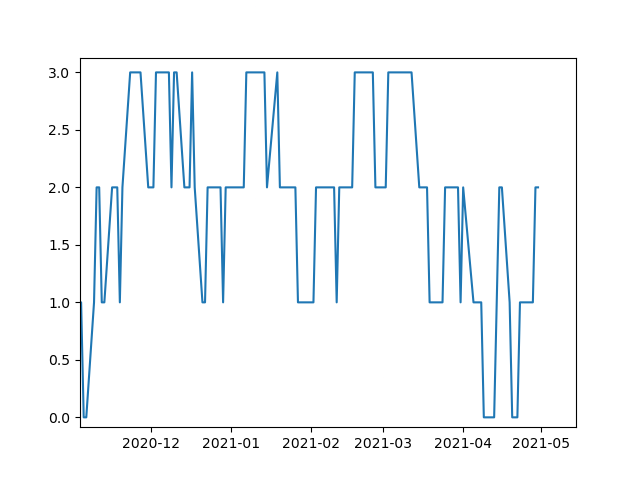

In [3]:
plt.close()
plt.plot(xle['rsi_indicator']+xle['adx_indicator']+xle['squeeze_on']+xle['macd_indicator'])
plt.show()